# 4.5 - Keşifsel Veri Analizi 1: Tek Değişkenli Analiz
### Sorular:
1) Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.<br>
2) Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?<br>
3) Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?<br>
4) Matematik ve okuma notlarının dağılımı nedir?<br>
5) Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.<br>

<i>Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.</i>

### Soru 1: Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
import seaborn as sns; sns.set(style="whitegrid")
import warnings; warnings.filterwarnings("ignore")

plt.rcParams["figure.dpi"] = 100    # https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files

education = pd.read_csv("states_all.csv")

In [19]:
# education.iloc[:, 3:].notnull().sum()    # ilk 3 değişken, indeks niteliğinde olduğundan atlandı.

education.notnull().sum()    # dolu değerlerin sayısı

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL                          1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1542
GRADES_KG_G                     1632
GRADES_4_G                      1632
GRADES_8_G                      1632
GRADES_12_G                     1632
GRADES_1_8_G                    1020
GRADES_9_12_G                   1071
GRADES_ALL_G                    1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

In [20]:
print("Toplam null olmayan veri sayısı: ", education.notnull().sum().sum())
print("Toplam null olan veri sayısı: ", education.isnull().sum().sum())

Toplam null olmayan veri sayısı:  31965
Toplam null olan veri sayısı:  10910


* **Kaç tane değişkenimiz var?**
    * 22 adet değişken, 3 adet (PRIMARY_KEY, STATE, YEAR) indeksimiz var. ## bu 3 değişkene index denebilir mi?
* **Veri kümesinde kaç veri noktası var?**
    * 31965 dolu, 10910 boş veri noktası var.
* **Hangi değişkenler sürekli, hangileri kategorik?**
    * Kategorik değişkenler: STATE, PRIMARY_KEY, YEAR
    * Sürekli değişkenler: Diğer tüm değişkenleri sürekli değişken olarak tanımlayabiliriz.
* **Eksik veri var mı? Eğer öyleyse, ne kadar?**
    * 10910 adet eksik veri var.
* **Değişkenlerden herhangi birinin bilinen bir olasılık dağılımı var mı (normal, Poisson, Gamma, vb.)?**
    * Son 4 değişken olan MATEMATİK ve OKUMA SKORLARI, normal dağılıma yakın bir davranış sergilemektedir. 

In [21]:
# Değişkenlerin her birinin merkezi eğilimleri nelerdir?
# Değişkenlerin her birinde ne kadar varyans var?
pd.options.display.float_format = "{:.1f}".format

df = pd.DataFrame()
for i in education.columns[3:]:
    df = df.append({"Columns":i,
                    "Mean":education[i].mean().astype(int),
                    "Median":education[i].median(),
                    "Variance":education[i].var()}, ignore_index=True)
df

,Columns,Mean,Median,Variance
0,ENROLL,917541.0,649933.5,1137452535760.8
1,TOTAL_REVENUE,9102044.0,5085826.0,138288667895593.9
2,FEDERAL_REVENUE,767779.0,403548.0,1315589517875.5
3,STATE_REVENUE,4223742.0,2537754.0,30799556554489.4
4,LOCAL_REVENUE,4110522.0,2058996.0,30135290660531.6
5,TOTAL_EXPENDITURE,9206242.0,5242672.0,143827036268204.4
6,INSTRUCTION_EXPENDITURE,4768010.0,2658253.0,39697174003993.0
7,SUPPORT_SERVICES_EXPENDITURE,2682586.0,1525471.0,11270889194647.5
8,OTHER_EXPENDITURE,429950.0,271704.0,285999607385.6
9,CAPITAL_OUTLAY_EXPENDITURE,903467.0,510428.0,1767499703003.7


**Değişkenleri histogramlara dökerek, görsel olarak gözlemleyelim.**

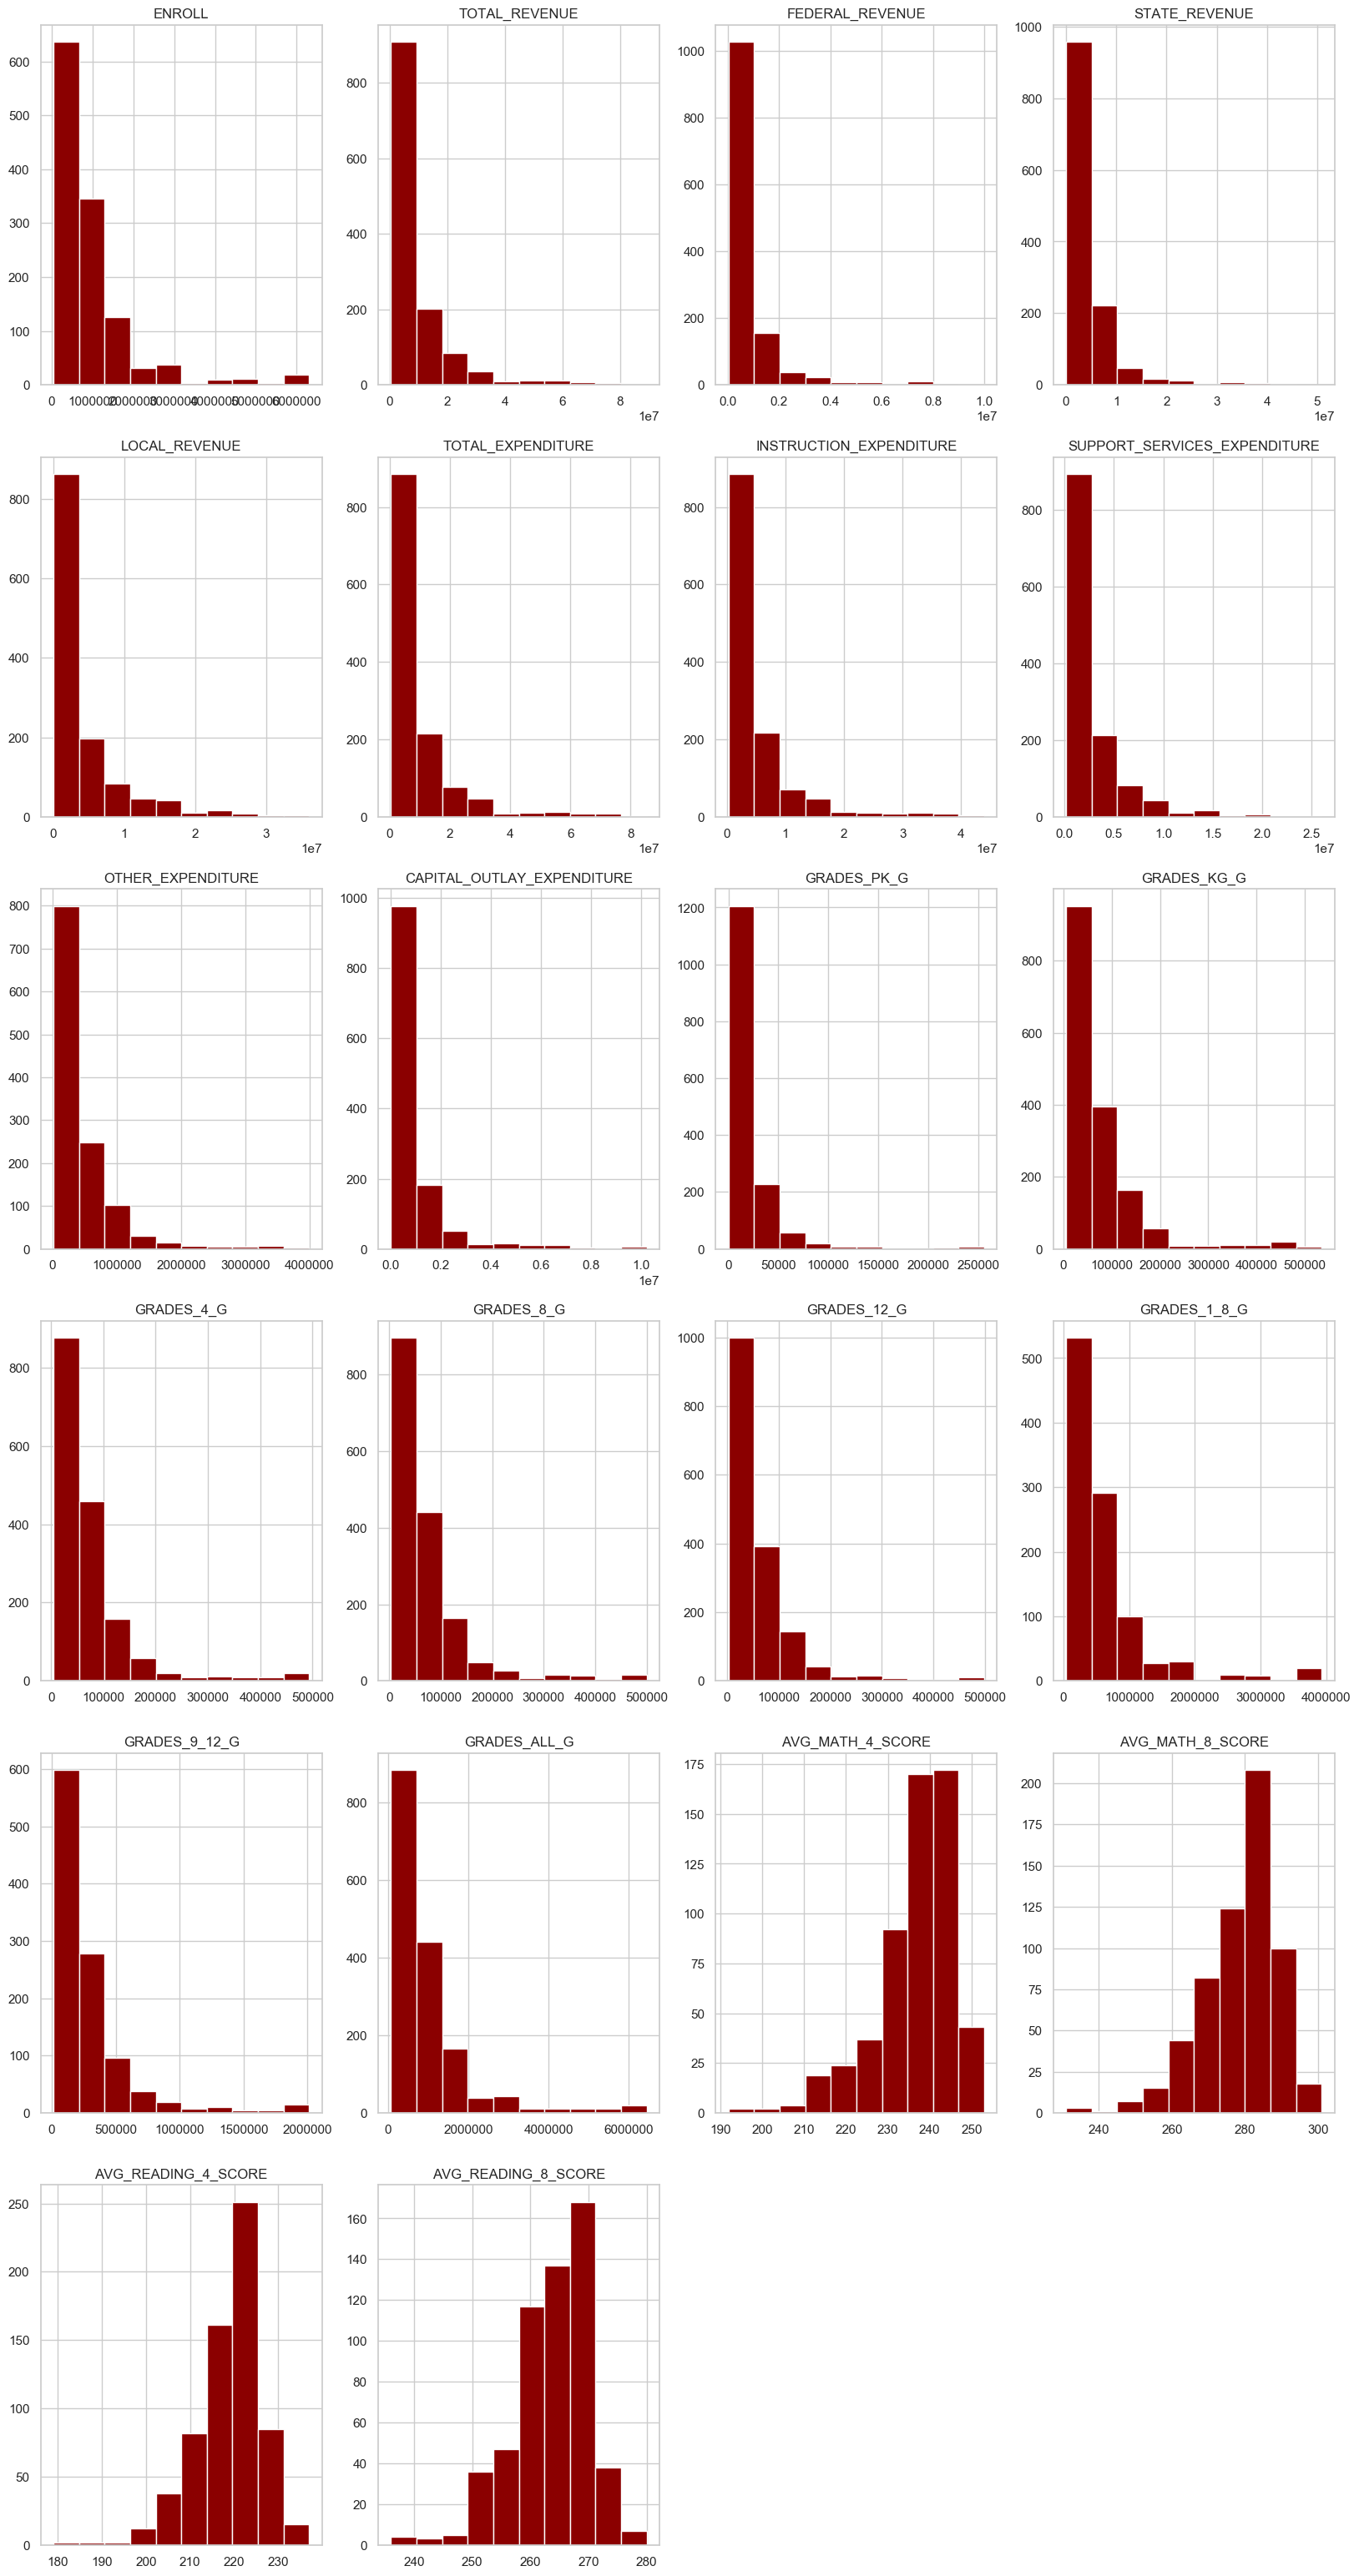

In [22]:
# Histogram grafik
plt.figure(figsize=(20,40))
for i in range(3,len(education.columns)):
    plt.subplot(6,4,i-2)
    plt.hist(education[education.columns[i]], color = "darkred")
    plt.title(education.columns[i])

#plt.tight_layout()
plt.show()

## ENROLL'ın x eksenindeki rakamlar birbirine girmiş. daha sade gözükmesi için, 1e6 (1.000.000) gibi bir değer
## ayarlamaya çalıştım. ax.Axes.ticklabel_format(axis="x", style="plain") kullanmayı denedim ama işin içinden çıkamadım.
## https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html

* "Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin." ##öenmli gördüğümüz noktalar nelerdir?


### Soru 2: Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

In [23]:
edu_cali = education[education["STATE"]=="CALIFORNIA"]
edu_cali.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,nan,nan,5254844.0,208.0,261.0,202.0,nan
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,nan,nan,5327231.0,nan,nan,nan,nan
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,nan,nan,5407475.0,nan,nan,197.0,nan
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,nan,nan,5536406.0,nan,nan,nan,nan
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,nan,nan,5686198.0,nan,nan,nan,nan


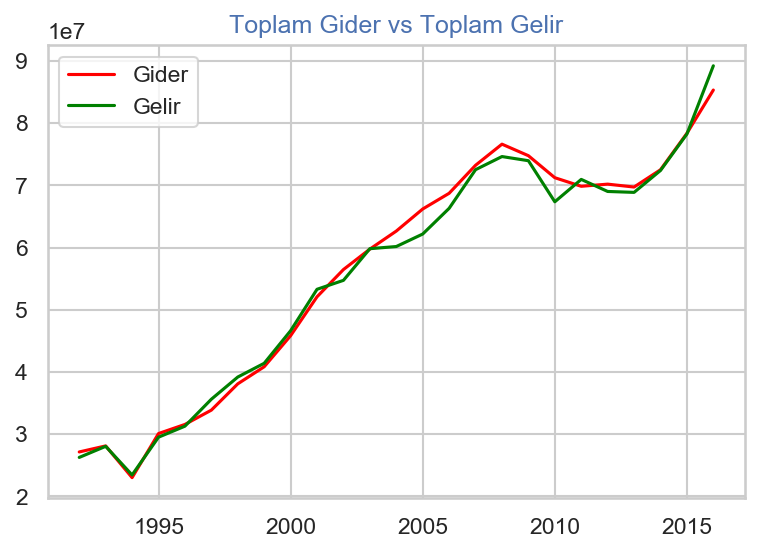

In [24]:
%matplotlib inline
plt.figure(dpi=150)
plt.plot(edu_cali.YEAR, edu_cali["TOTAL_EXPENDITURE"], color="red", label="Gider")
plt.plot(edu_cali.YEAR, edu_cali["TOTAL_REVENUE"], color="green", label="Gelir")
plt.title("Toplam Gider vs Toplam Gelir", c="b")
plt.legend()
plt.show()

In [25]:
print(f"""California eyaletinin;\nMinimum 'Toplam Gider' değeri: {edu_cali.TOTAL_EXPENDITURE.min()} \
(Yıl = {int(edu_cali[edu_cali.TOTAL_EXPENDITURE==edu_cali.TOTAL_EXPENDITURE.min()].YEAR)}),
Maksimum 'Toplam Gider' değeri: {edu_cali["TOTAL_EXPENDITURE"].max()} \
(Yıl = {int(edu_cali[edu_cali.TOTAL_EXPENDITURE==edu_cali.TOTAL_EXPENDITURE.max()].YEAR)}),

Minimum 'Toplam Gelir' değeri: {edu_cali.TOTAL_REVENUE.min()} \
(Yıl = {int(edu_cali[edu_cali["TOTAL_REVENUE"]==edu_cali.TOTAL_REVENUE.min()].YEAR)}),
Maksimum 'Toplam Gelir' değeri: {edu_cali.TOTAL_REVENUE.max()} \
(Yıl = {int(edu_cali[edu_cali["TOTAL_REVENUE"]==edu_cali.TOTAL_REVENUE.max()].YEAR)}).""")

## TOPLAM_GELİR'in maksimum olduğu YIL'ı şu şekilde gösterdik:
## int(edu_cali[edu_cali["TOTAL_REVENUE"] == edu_cali.TOTAL_REVENUE.max()].YEAR)
## Daha kısa bir yolu var mı?

California eyaletinin;
Minimum 'Toplam Gider' değeri: 23012688.0 (Yıl = 1994),
Maksimum 'Toplam Gider' değeri: 85320133.0 (Yıl = 2016),

Minimum 'Toplam Gelir' değeri: 23440845.0 (Yıl = 1994),
Maksimum 'Toplam Gelir' değeri: 89217262.0 (Yıl = 2016).


Verilerden anlaşılabileceği üzere, toplam gelir ve gider yıllar boyu artış trendi göstermiş; <br>
2005-2010 yılları arasında lokal maksimum değeri görsek de, global **maksimum** değeri <i>(zirve)</i> **2016** yılında, global **minimum** <i>(dip)</i> değeri **1994** yılında görmüştür.

### Soru 3: Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

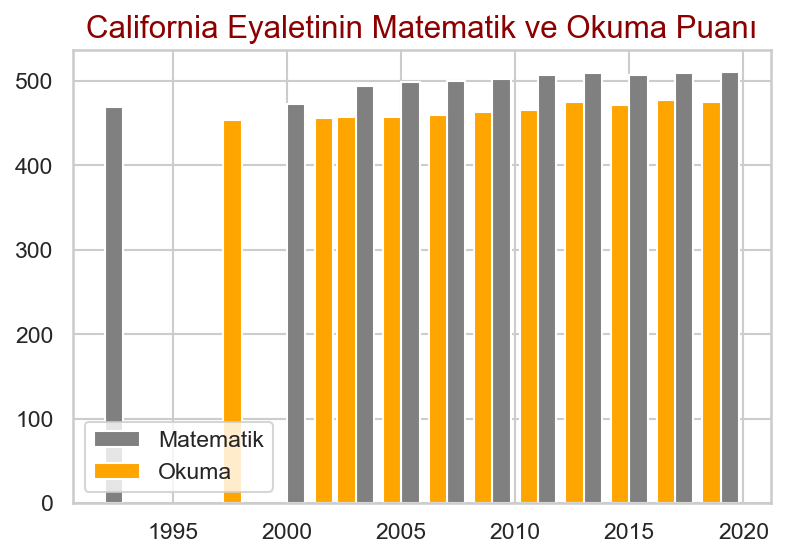

In [26]:
edu_cali["MATH"] = edu_cali.AVG_MATH_4_SCORE + edu_cali.AVG_MATH_8_SCORE
edu_cali["READING"] = edu_cali.AVG_READING_4_SCORE + edu_cali.AVG_READING_8_SCORE

plt.figure(dpi=150)
plt.bar(edu_cali.YEAR, edu_cali["MATH"], color="gray", label="Matematik", width=0.8, align="edge")
plt.bar(edu_cali.YEAR, edu_cali["READING"], color="orange", label="Okuma", width=-0.8, align="edge")
plt.title("California Eyaletinin Matematik ve Okuma Puanı", c="darkred", fontsize=15)
plt.legend(loc="lower left", frameon=True)
plt.show()

Veri noktaları barındıran tüm yıllar boyunca California eyaletindeki öğrencilerin **Matematik** skorları, **Okuma** skorlarından daha yüksel olmuştur.

### Soru 4: Matematik ve okuma notlarının dağılımı nedir?

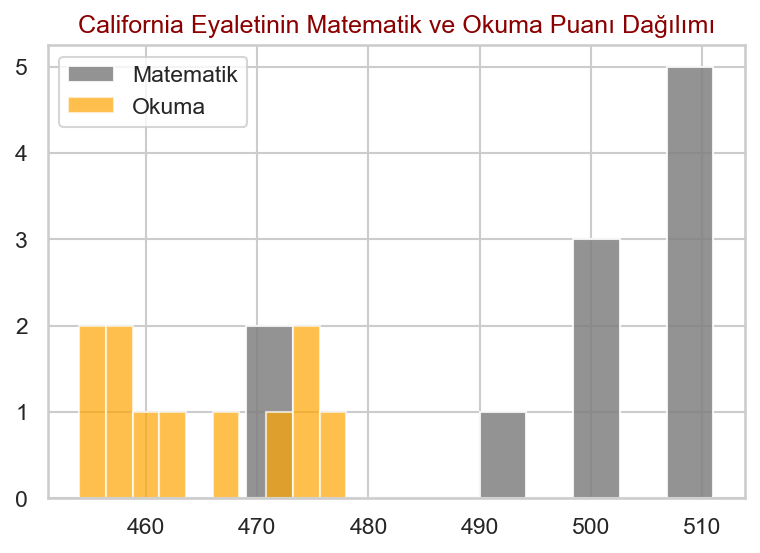

In [27]:
plt.figure(dpi=150)
plt.hist(edu_cali.MATH, color="gray", label="Matematik", alpha=0.85)
plt.hist(edu_cali.READING, color="orange", label="Okuma", alpha=0.7)
plt.title("California Eyaletinin Matematik ve Okuma Puanı Dağılımı", c="darkred", fontsize=12)
plt.legend(loc="upper left", frameon=True)
plt.show()

Matematik notlarının dağılımı: ? ## Normal ya da Gauss gibi bir dağılımdan mı söz etmemiz gerekiyor?<br>
Okuma notlarının dağılımı: ? <br>

### Soru 5: Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

#### Enterpolasyon ile doldurma:

In [28]:
edu_cali_interpolation = pd.DataFrame()
for i in edu_cali.columns[-2:]:
    fill_with = edu_cali[i].interpolate(method="linear")
    edu_cali_interpolation[i] = edu_cali[i].fillna(fill_with, inplace=False)

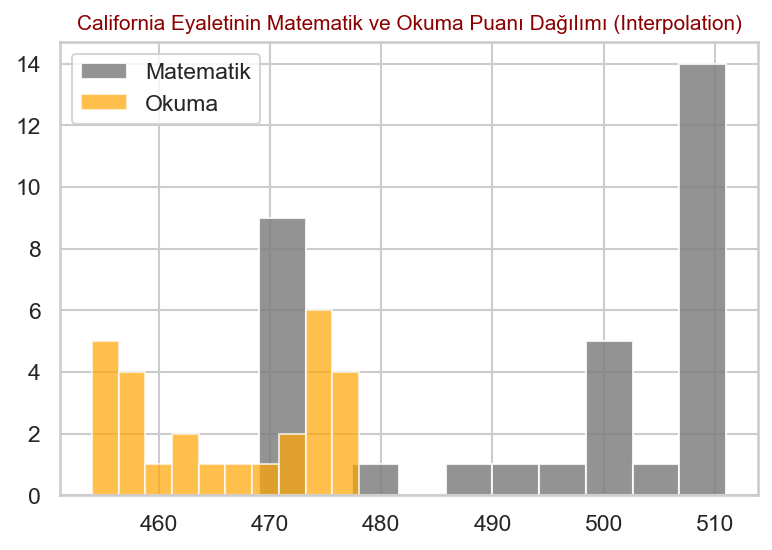

In [29]:
plt.figure(dpi=150)
plt.hist(edu_cali_interpolation.MATH, color="gray", label="Matematik", alpha=0.85)
plt.hist(edu_cali_interpolation.READING, color="orange", label="Okuma", alpha=0.7)
plt.title("California Eyaletinin Matematik ve Okuma Puanı Dağılımı (Interpolation)", c="darkred", fontsize=10)
plt.legend(loc="upper left", frameon=True)
plt.show()

#### Medyan ile doldurma:

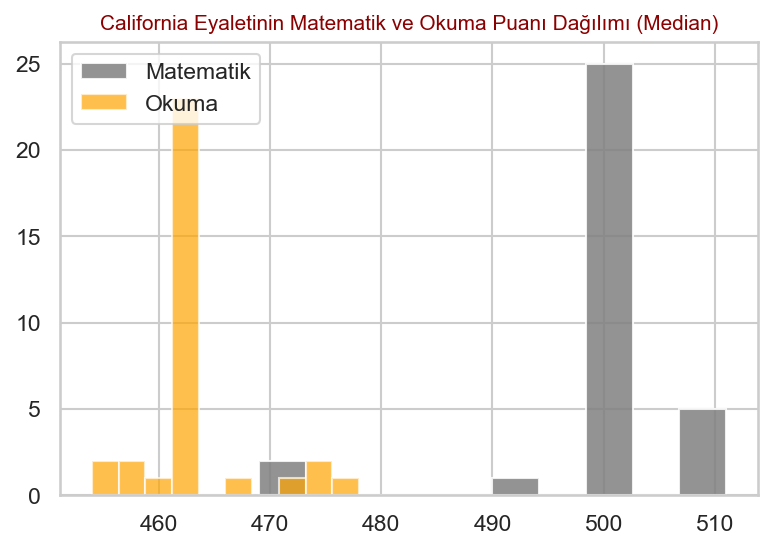

In [30]:
edu_cali_median = pd.DataFrame()
for i in edu_cali.columns[-2:]:
    fill_with = edu_cali[i].median()
    edu_cali_median[i] = edu_cali[i].fillna(fill_with, inplace=False)
    
plt.figure(dpi=150)
plt.hist(edu_cali_median.MATH, color="gray", label="Matematik", alpha=0.85)
plt.hist(edu_cali_median.READING, color="orange", label="Okuma", alpha=0.7)
plt.title("California Eyaletinin Matematik ve Okuma Puanı Dağılımı (Median)", c="darkred", fontsize=10)
plt.legend(loc="upper left", frameon=True)
plt.show()

#### Ortalama ile doldurma:

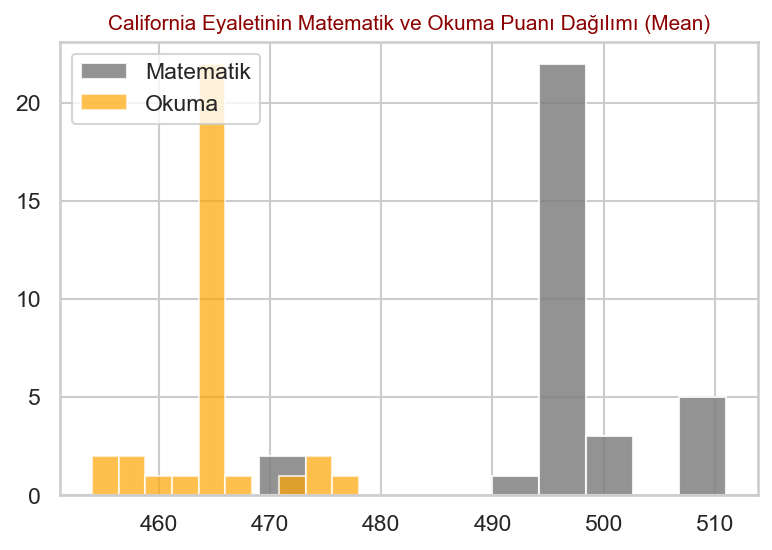

In [31]:
edu_cali_mean = pd.DataFrame()
for i in edu_cali.columns[-2:]:
    fill_with = edu_cali[i].mean()
    edu_cali_mean[i] = edu_cali[i].fillna(fill_with, inplace=False)
    
plt.figure(dpi=150)
plt.hist(edu_cali_mean.MATH, color="gray", label="Matematik", alpha=0.85)
plt.hist(edu_cali_mean.READING, color="orange", label="Okuma", alpha=0.7)
plt.title("California Eyaletinin Matematik ve Okuma Puanı Dağılımı (Mean)", c="darkred", fontsize=10)
plt.legend(loc="upper left", frameon=True)
plt.show()

### Yorum:
Median ve mean metodları, verileri üzerinde anormal bir dağılıma sebep olmuştur. Dolayısıyla enterpolasyon yaklaşımı, daha mantıklı bir dağılım sergilemiştir. ## burada daha geniş bir yorum yapılabilir mi?